In [59]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [60]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.4.1'

In [61]:
def getTestandTrainSplit():
    iris_df_train =  pd.read_csv(r'C:\Users\rajes\OneDrive\Documents\AMPBA\DL\iris_training.csv', header=None)
    iris_df_test =  pd.read_csv(r'C:\Users\rajes\OneDrive\Documents\AMPBA\DL\iris_test.csv', header=None)

    x_train = iris_df_train.iloc[:,0:4].values
    y_train = iris_df_train.iloc[:,-1].values

    x_test = iris_df_test.iloc[:,0:4].values
    y_test = iris_df_test.iloc[:,-1].values
    
    return x_train,y_train, x_test,y_test


In [64]:
x_train,y_train, x_test,y_test = getTestandTrainSplit()

In [94]:
# SETTING UP HYPERPARAMETERS AND DATA SET PARAMETERS
num_classes = 3 # -- Iris Setosa -- Iris Versicolour -- Iris Virginica
num_features = 4 # 1. sepal length in cm 2. sepal width in cm  3. petal length in cm 4. petal width in cm


# Training parameters.
learning_rate = 0.003
training_steps = 1000
batch_size = 10
display_step = 100

hidden1=5
hidden2=10
hidden3=5

epochs=50

In [87]:
# LOADING AND PREPARING THE MNIST DATA SET
x_train,y_train, x_test,y_test = getTestandTrainSplit()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

print(len(x_train),len(x_test),len(y_train),len(y_test))

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])



120 30 120 30


In [88]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [89]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [90]:
model = Sequential()
model.add(Dense(hidden1, activation='relu'))
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(hidden3, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [91]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [92]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))
#['accuracy', 'loss', 'val_accuracy', 'val_loss']
history = AccuracyHistory()

# Define the Keras TensorBoard callback.
from datetime import datetime
logdir="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback,history])

Epoch 1/50
12/12 [==============================] - 1s 124ms/step - loss: 0.9362 - accuracy: 0.7000 - val_loss: 0.9782 - val_accuracy: 0.5333
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9213 - accuracy: 0.7000 - val_loss: 0.9730 - val_accuracy: 0.5333
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.7000 - val_loss: 0.9615 - val_accuracy: 0.5333
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9012 - accuracy: 0.7000 - val_loss: 0.9536 - val_accuracy: 0.5333
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.8884 - accuracy: 0.7000 - val_loss: 0.9453 - val_accuracy: 0.5333
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8768 - accuracy: 0.7000 - val_loss: 0.9352 - val_accuracy: 0.5333
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8669 - accuracy: 0.7000 - val_loss: 0.9258 - val_accuracy: 0.5333
Epoch 8/50
12/12 [

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 18        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


Test loss: 1.1210906505584717
Test accuracy: 0.2666666805744171


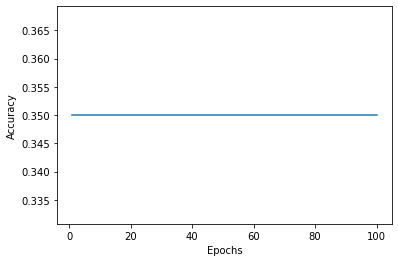

In [80]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()